Час обчислення: 0.00231 с
Кількість операцій множення: 5354
Кількість операцій додавання: 2016
Вхідний сигнал: [ 0.57235192  0.87631438 -0.30499151  0.98946627  0.7413309  -0.61586311
  0.19252109 -2.27731658 -1.31109659 -1.02738976 -0.92883142  1.01574701
 -0.20589716  1.31552934  0.73026227 -0.26142501 -1.57149205 -0.45710855
 -0.11166184  0.15146731 -0.86763824 -1.49979348 -1.12222922  0.44392068
  0.05519687 -0.56655681 -0.48976159  0.22085909  0.99637398  0.02871132
 -1.75190384 -0.61766176 -0.29333655 -0.76201346  0.74032729 -0.92297736
  1.23146405 -0.38390356 -1.62101887  1.65131032  0.84047201  0.82088842
 -1.4960715   1.09792377 -0.22132346 -1.47702651 -0.42294876  1.01902114
  0.4511918  -0.45387628 -0.41440833  1.44074696  0.95947381  0.04012898
 -0.70773848 -1.70653362  0.74381272  0.06972103  0.72504446  0.44631917
  1.86041265  1.05062194 -1.09042162 -0.13349733]
Результат ШПФ:
C_0 = (-4.576781210287464+0j)
C_1 = (5.314266012017173+8.44421467742045j)
C_2 = (3.00985028407

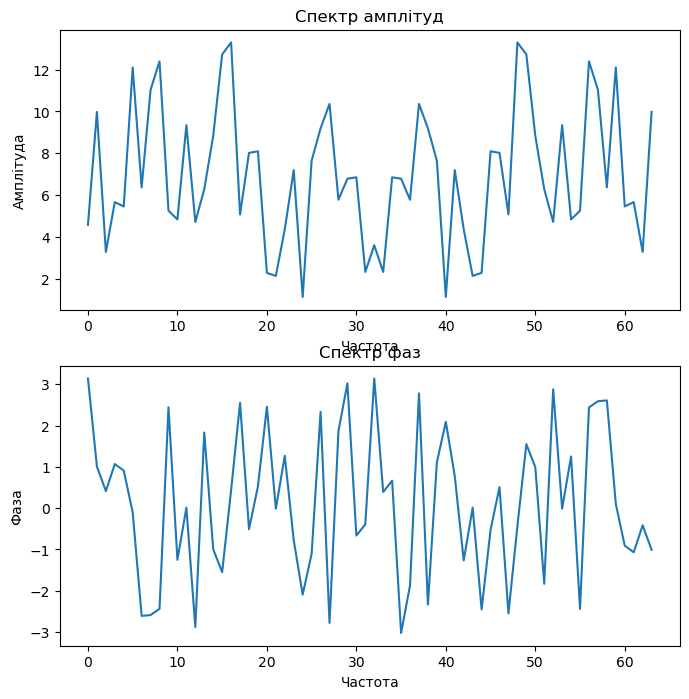

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

def fft(x):
    n = len(x)
    if n <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / n) * odd[k] for k in range(n // 2)]
    return [even[k] + T[k] for k in range(n // 2)] + \
           [even[k] - T[k] for k in range(n // 2)]

def generate_signal(length):
    return np.random.randn(length)

# Генерація вхідного сигналу
x = generate_signal(64)

# Обчислення ШПФ та розрахунок часу і кількості операцій
t0 = time.time()
y = fft(x)
t1 = time.time()

num_mults = 0
num_adds = 0
for n in range(len(x)):
    num_mults += n/2 * np.log2(n + 1)
    num_adds += n* np.log2(n + 1) - 2*(n/2 * np.log2((n + 1)/2))

# Виведення результатів
print("Час обчислення: {:.5f} с".format(t1 - t0))
print("Кількість операцій множення: {:.0f}".format(num_mults))
print("Кількість операцій додавання: {:.0f}".format(num_adds))
print("Вхідний сигнал:", x)
print("Результат ШПФ:")
for i in range(len(y)):
    print("C_{} = {}".format(i, y[i]))

# Розрахунок спектру амплітуд та фаз
fft_abs = np.abs(y)
fft_phase = np.angle(y)

# Побудова графіків спектру амплітуд та фаз
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(np.arange(len(fft_abs)), fft_abs)
axs[0].set_title("Спектр амплітуд")
axs[0].set_xlabel("Частота")
axs[0].set_ylabel("Амплітуда")
axs[1].plot(np.arange(len(fft_phase)), fft_phase)
axs[1].set_title("Спектр фаз")
axs[1].set_xlabel("Частота")
axs[1].set_ylabel("Фаза")
plt.show()
